## Librerias a utilizar
 - Pandas es utilizado para la carga y manipulacion de datos
 - Matplotlib es utilizado para realizar graficos
 - Numpy es utilizado para realizar calculos matematicos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

### Carga de archivo
Para la carga de archivos se utiliza el comando ***read_csv()*** que es parte de la libreria *Pandas*

In [22]:
df = pd.read_csv('BD1.csv')

In [8]:
def group(i):
    if i == '':
        return np.nan
    elif i == 4 or i == 5 or i == 24:
        return 5
    elif  i == 2 or i == 3:
        return 4
    elif i == 6 or i == 13 or i == 23 or i == 31 or i == 32 or i == 99:
        return 3
    elif i == 14 or i == 17 or i == 18 or i == 20:
        return 2
    else:
        return 1

In [10]:
def lc(i):
    if i == 1:
        return 'Supermercado'
    elif i == 2:
        return 'Mayorista'
    elif i == 3:
        return 'Minorista'
    elif i == 4:
        return 'Frigorifico'
    else:
        return 'Tienda'

def fc(i):
    if i == 1:
        return 'Diaria'
    elif i == 2:
        return '2-3 v/sem'
    elif i == 3:
        return '4-6 v/sem'
    elif i == 4:
        return '1 v/sem'
    elif i == 5:
        return 'Quincenal'
    elif i == 6:
        return 'Mensual'
    elif i == 7:
        return 'Bimensual'
    elif i == 8:
        return 'Trimestral'
    elif i == 9:
        return 'Semestral'
    else:
        return 'Anual'

In [87]:
def pltfig(df1, df2, xaxis=0, kind='bar', colorpie=['orange', 'mediumturquoise'], colorbar='mediumvioletred'):
    ser_1 = df1.value_counts(normalize=False).sort_index()
    freq_1 = ser_1.to_numpy()
    per_1 = freq_1 / np.sum(freq_1) * 100
    cod_1 = ser_1.index.to_numpy()    
    ser_2 = df2.value_counts(normalize=False).sort_index()
    freq_2 = ser_2.to_numpy()
    per_2 = freq_2 / np.sum(freq_2) * 100
    cod_2 = ser_2.index.to_numpy()
    if xaxis == 'lc':
        xaxis_1 = [lc(x) for x in cod_1]
        xaxis_2 = [lc(x) for x in cod_2]
    elif xaxis == 'fc':
        xaxis_1 = [fc(x) for x in cod_1]
        xaxis_2 = [fc(x) for x in cod_2]
    else:
        xaxis_1 = cod_1
        xaxis_2 = cod_2
    if kind=='bar':
        rcParams['figure.figsize']=15,5
        plt.subplot(1, 2, 1)
        plt.title('Municipio 1', fontsize=15)
        plt.ylabel('Porcentaje (%)', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.bar(xaxis_1, per_1,color=colorbar)
        plt.subplot(1, 2, 2)
        plt.title('Municipio 2', fontsize=15)
        plt.ylabel('Porcentaje (%)', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.bar(xaxis_2, per_2, color=colorbar)
        plt.show()
    else:
        rcParams['figure.figsize']=15,5
        plt.subplot(1,2,1)
        plt.title('Municipio 1')
        n_1 = plt.pie(freq_1, colors=colorpie, startangle=90, autopct='%1.1f%%')
        plt.legend(n_1[0], xaxis_1, loc="best")
        plt.axis('equal')
        plt.tight_layout()
        plt.subplot(1,2,2)
        plt.title('Municipio 2')
        n_2 = plt.pie(freq_2, colors=colorpie, startangle=90, autopct='%1.1f%%')
        plt.legend(n_2[0], xaxis_2, loc="best")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
    return freq_1, per_1, freq_2, per_2

### Nueva Codificacion de los lugares de compra
| Lugar de compra | Cod. |
|-----------------|------|
| Supermercado    |   1  |
| Mayorista       |   2  |
| Minorista       |   3  |
| Frigorifico     |   4  |
| Tienda          |   5  |

In [23]:
lugarcompra = list(df[df.columns[53::5]])
df[lugarcompra] = df[lugarcompra].fillna(value='')
display(df[lugarcompra].head())
pd.options.mode.chained_assignment = None
for j in lugarcompra:
    for i in range(len(df[j])):
        val = df[j][i]
        rval = group(val)
        df[j][i] = rval

display(df[lugarcompra].head())

,"3.4. ¿Comunmente, dónde compra el alimento? (Carne de res)","3.4. ¿Comunmente, dónde compra el alimento? (Carne de cerdo)","3.4. ¿Comunmente, dónde compra el alimento? (Carnes procesadas)","3.4. ¿Comunmente, dónde compra el alimento? (Pescados)","3.4. ¿Comunmente, dónde compra el alimento? (Pollo)","3.4. ¿Comunmente, dónde compra el alimento? (Fresa)","3.4. ¿Comunmente, dónde compra el alimento? (Papaya)","3.4. ¿Comunmente, dónde compra el alimento? (Banano)","3.4. ¿Comunmente, dónde compra el alimento? (Manzana)","3.4. ¿Comunmente, dónde compra el alimento? (Mandarina)",...,"3.4. ¿Comunmente, dónde compra el alimento? (Harina de maíz)","3.4. ¿Comunmente, dónde compra el alimento? (Pasta)","3.4. ¿Comunmente, dónde compra el alimento? (Azúcar)","3.4. ¿Comunmente, dónde compra el alimento? (Sal)","3.4. ¿Comunmente, dónde compra el alimento? (Chocolate)","3.4. ¿Comunmente, dónde compra el alimento? (Café)","3.4. ¿Comunmente, dónde compra el alimento? (Panela)","3.4. ¿Comunmente, dónde compra el alimento? (Pan)","3.4. ¿Comunmente, dónde compra el alimento? (Galletas)","3.4. ¿Comunmente, dónde compra el alimento? (Agua)"
0,2,2,,9,,,9,9,13,13,...,1,,1,1,1,1,1,,,
1,2,2,,13,13,6,6,,,6,...,13,13,13,13,13,13,13,5,5,
2,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,,13,5,5,
3,2,,,,2,,,13,13,13,...,,9,9,9,9,9,9,5,,
4,,,,11,11,13,13,13,13,13,...,,16,16,16,,16,,,16,1


,"3.4. ¿Comunmente, dónde compra el alimento? (Carne de res)","3.4. ¿Comunmente, dónde compra el alimento? (Carne de cerdo)","3.4. ¿Comunmente, dónde compra el alimento? (Carnes procesadas)","3.4. ¿Comunmente, dónde compra el alimento? (Pescados)","3.4. ¿Comunmente, dónde compra el alimento? (Pollo)","3.4. ¿Comunmente, dónde compra el alimento? (Fresa)","3.4. ¿Comunmente, dónde compra el alimento? (Papaya)","3.4. ¿Comunmente, dónde compra el alimento? (Banano)","3.4. ¿Comunmente, dónde compra el alimento? (Manzana)","3.4. ¿Comunmente, dónde compra el alimento? (Mandarina)",...,"3.4. ¿Comunmente, dónde compra el alimento? (Harina de maíz)","3.4. ¿Comunmente, dónde compra el alimento? (Pasta)","3.4. ¿Comunmente, dónde compra el alimento? (Azúcar)","3.4. ¿Comunmente, dónde compra el alimento? (Sal)","3.4. ¿Comunmente, dónde compra el alimento? (Chocolate)","3.4. ¿Comunmente, dónde compra el alimento? (Café)","3.4. ¿Comunmente, dónde compra el alimento? (Panela)","3.4. ¿Comunmente, dónde compra el alimento? (Pan)","3.4. ¿Comunmente, dónde compra el alimento? (Galletas)","3.4. ¿Comunmente, dónde compra el alimento? (Agua)"
0,4,4,NaN,1,NaN,NaN,1,1,3,3,...,1,NaN,1,1,1,1,1,NaN,NaN,NaN
1,4,4,NaN,3,3,3,3,NaN,NaN,3,...,3,3,3,3,3,3,3,5,5,NaN
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,NaN,3,5,5,NaN
3,4,NaN,NaN,NaN,4,NaN,NaN,3,3,3,...,NaN,1,1,1,1,1,1,5,NaN,NaN
4,NaN,NaN,NaN,1,1,3,3,3,3,3,...,NaN,1,1,1,NaN,1,NaN,NaN,1,1


### Agrupacion por municipios

In [16]:
m1 = df[df['1.3. Municipio']==25126]
m2 = df[df['1.3. Municipio']==25175]

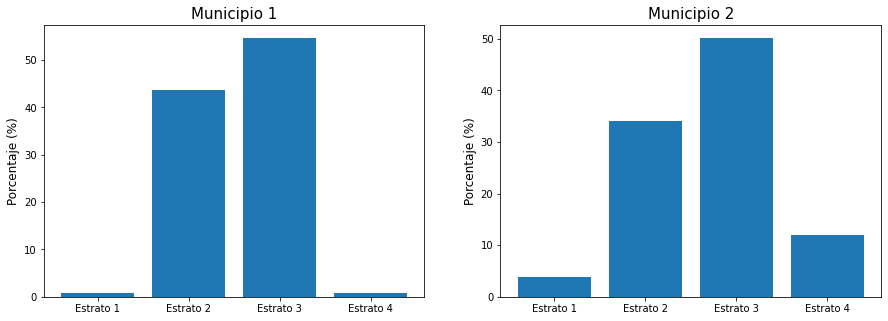

(array([  2, 103, 129,   2], dtype=int64),
 array([ 0.84745763, 43.6440678 , 54.66101695,  0.84745763]),
 array([ 10,  91, 134,  32], dtype=int64),
 array([ 3.74531835, 34.082397  , 50.18726592, 11.98501873]))

In [74]:
ser_1 = m1['2.2. ¿Cuál es el estrato socioeconómico que aparece en su recibo de la luz?']
ser_2 = m2['2.2. ¿Cuál es el estrato socioeconómico que aparece en su recibo de la luz?']
pltfig(ser_1, ser_2)

### Agrupacion 
Se realizo una agrupacion segun las 10 categorias mencionadas en el documento de la encuesta

In [21]:
preguntas = np.array(list(df))
np.where(preguntas =='3.3. ¿Con qué frecuencia compra el alimento? (Carne de res)')
#print (preguntas)

(array([52], dtype=int32),)

In [26]:
carnes = [m1[m1.columns[51:76]], m2[m2.columns[51:76]]]
frutas = [m1[m1.columns[76:181]], m2[m2.columns[76:181]]]
verduras = [m1[m1.columns[181:256]], m2[m2.columns[181:256]]]
tuberculos = [m1[m1.columns[256:281]], m2[m2.columns[256:281]]]
lacteos = [m1[m1.columns[281:296]], m2[m2.columns[281:296]]]
huevos = [m1[m1.columns[296:301]], m2[m2.columns[296:301]]]
cereales = [m1[m1.columns[301:321]], m2[m2.columns[301:321]]]
abarrotes = [m1[m1.columns[321:371]], m2[m2.columns[321:371]]]
panaderia = [m1[m1.columns[371:381]], m2[m2.columns[371:381]]]
bebidas = [m1[m1.columns[381:386]], m2[m2.columns[381:386]]]

## Lugar de Compra
A continuacion se realizan histogramas para determinar los lugares de compra mas populares de acuerdo a las categorias mencionadas anteriormente

### Carne de Res

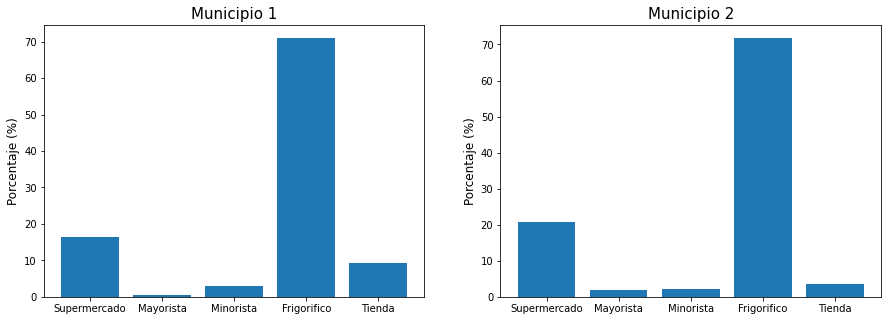

(array([ 34,   1,   6, 147,  19], dtype=int64),
 array([16.42512077,  0.48309179,  2.89855072, 71.01449275,  9.17874396]),
 array([ 47,   4,   5, 163,   8], dtype=int64),
 array([20.70484581,  1.76211454,  2.20264317, 71.8061674 ,  3.52422907]))

In [64]:
res_1 = carnes[0][carnes[0].columns[2]]
res_2 = carnes[1][carnes[1].columns[2]]
pltfig(res_1, res_2, 'lc')

### Carne de Cerdo

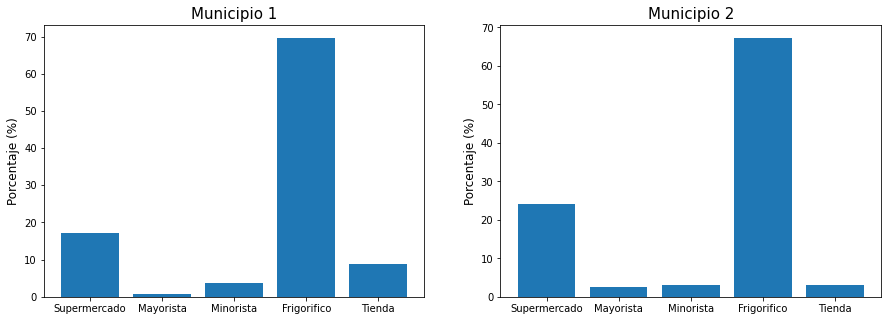

(array([ 27,   1,   6, 110,  14], dtype=int64),
 array([17.08860759,  0.63291139,  3.79746835, 69.62025316,  8.86075949]),
 array([ 40,   4,   5, 111,   5], dtype=int64),
 array([24.24242424,  2.42424242,  3.03030303, 67.27272727,  3.03030303]))

In [33]:
cerdo_1 = carnes[0][carnes[0].columns[7]]
cerdo_2 = carnes[1][carnes[1].columns[7]]
pltfig(cerdo_1, cerdo_2, 'lc')

### Carnes Procesadas

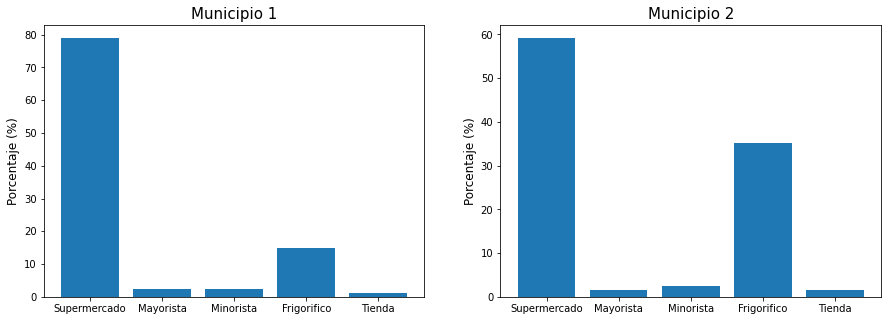

(array([64,  2,  2, 12,  1], dtype=int64),
 array([79.01234568,  2.4691358 ,  2.4691358 , 14.81481481,  1.2345679 ]),
 array([74,  2,  3, 44,  2], dtype=int64),
 array([59.2,  1.6,  2.4, 35.2,  1.6]))

In [34]:
procesadas_1 = carnes[0][carnes[0].columns[12]]
procesadas_2 = carnes[1][carnes[1].columns[12]]
pltfig(procesadas_1, procesadas_2, 'lc')

### Pescado

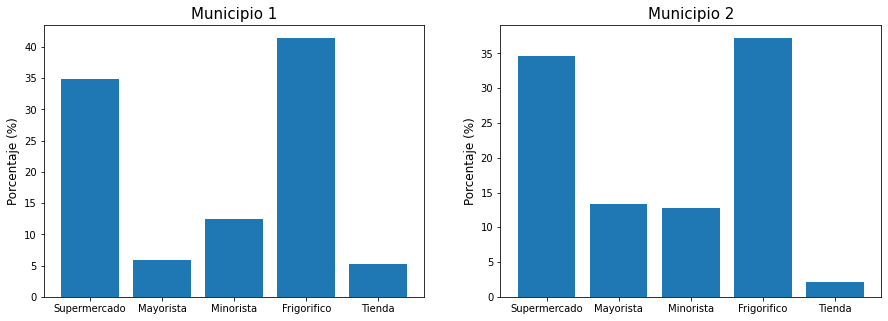

(array([53,  9, 19, 63,  8], dtype=int64),
 array([34.86842105,  5.92105263, 12.5       , 41.44736842,  5.26315789]),
 array([65, 25, 24, 70,  4], dtype=int64),
 array([34.57446809, 13.29787234, 12.76595745, 37.23404255,  2.12765957]))

In [35]:
pescado_1 = carnes[0][carnes[0].columns[17]]
pescado_2 = carnes[1][carnes[1].columns[17]]
pltfig(pescado_1, pescado_2, 'lc')

### Carne de Pollo

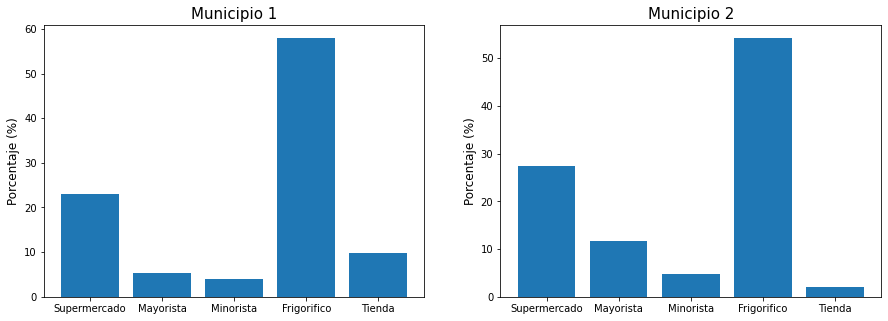

(array([ 52,  12,   9, 131,  22], dtype=int64),
 array([23.00884956,  5.30973451,  3.98230088, 57.96460177,  9.73451327]),
 array([ 68,  29,  12, 135,   5], dtype=int64),
 array([27.30923695, 11.64658635,  4.81927711, 54.21686747,  2.00803213]))

In [36]:
pollo_1 = carnes[0][carnes[0].columns[22]]
pollo_2 = carnes[1][carnes[1].columns[22]]
pltfig(pollo_1, pollo_2, 'lc')

### Frutas

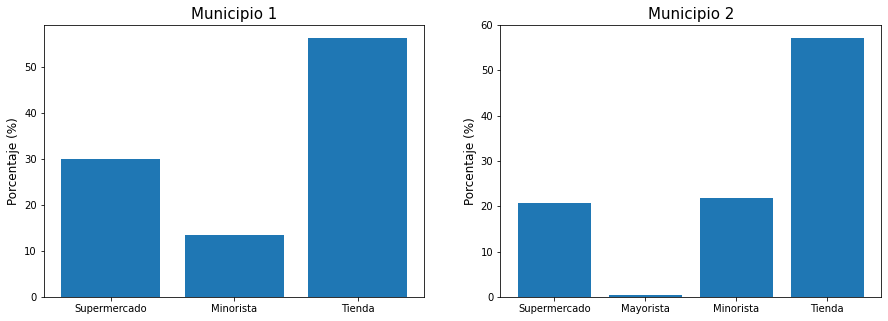

(array([ 71,  32, 133], dtype=int64),
 array([30.08474576, 13.55932203, 56.3559322 ]),
 array([ 55,   1,  58, 152], dtype=int64),
 array([20.67669173,  0.37593985, 21.80451128, 57.14285714]))

In [37]:
comprafruta_1 = frutas[0][frutas[0].columns[2::5]].mode(axis = 'columns',dropna = True)
comprafruta_2 = frutas[1][frutas[1].columns[2::5]].mode(axis = 'columns',dropna = True)
f_1 = comprafruta_1.squeeze()
f_2 = comprafruta_2.squeeze()
pltfig(f_1, f_2, 'lc')

### Verduras

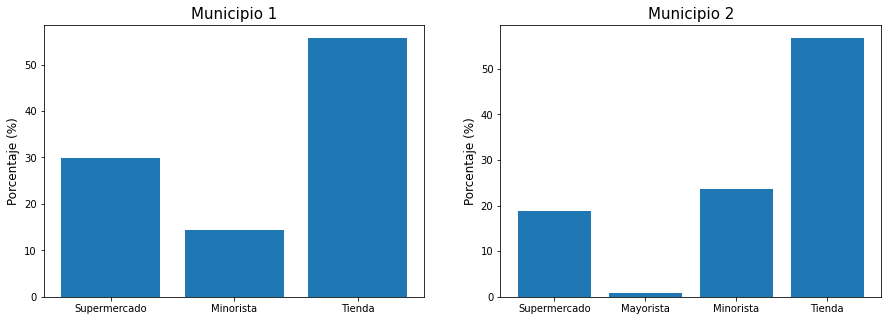

(array([ 70,  34, 131], dtype=int64),
 array([29.78723404, 14.46808511, 55.74468085]),
 array([ 50,   2,  63, 151], dtype=int64),
 array([18.79699248,  0.7518797 , 23.68421053, 56.76691729]))

In [38]:
compraverdura_1 = verduras[0][verduras[0].columns[2::5]].mode(axis = 'columns', numeric_only=False)
compraverdura_2 = verduras[1][verduras[1].columns[2::5]].mode(axis = 'columns', numeric_only=False)
v_1 = compraverdura_1[0].squeeze()
v_2 = compraverdura_2[0].squeeze()
pltfig(v_1, v_2, 'lc')

### Tuberculos

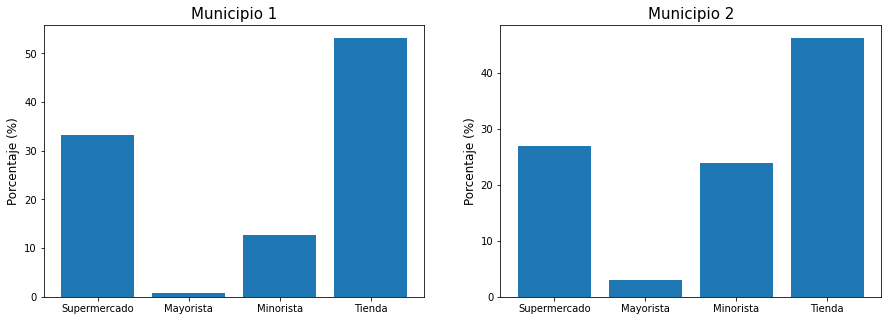

(array([ 78,   2,  30, 125], dtype=int64),
 array([33.19148936,  0.85106383, 12.76595745, 53.19148936]),
 array([ 71,   8,  63, 122], dtype=int64),
 array([26.89393939,  3.03030303, 23.86363636, 46.21212121]))

In [39]:
compratuberculos_1 = tuberculos[0][tuberculos[0].columns[2::5]].mode(axis = 'columns',numeric_only=False)
compratuberculos_2 = tuberculos[1][tuberculos[1].columns[2::5]].mode(axis = 'columns',numeric_only=False)
t_1 = compratuberculos_1[0].squeeze()
t_2 = compratuberculos_2[0].squeeze()
pltfig(t_1, t_2, 'lc')

### Leche y derivados

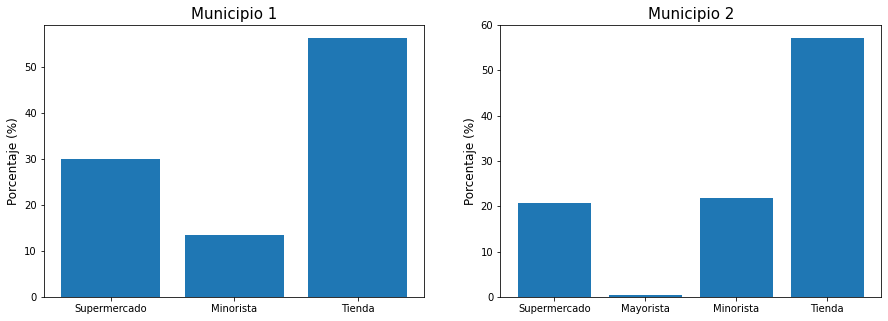

(array([ 71,  32, 133], dtype=int64),
 array([30.08474576, 13.55932203, 56.3559322 ]),
 array([ 55,   1,  58, 152], dtype=int64),
 array([20.67669173,  0.37593985, 21.80451128, 57.14285714]))

In [40]:
compralacteos_1 = lacteos[0][lacteos[0].columns[2::5]].mode(axis = 'columns',dropna = True)
compralacteos_2 = lacteos[1][lacteos[1].columns[2::5]].mode(axis = 'columns',dropna = True)
l_1 = compralacteos_1.squeeze()
l_2 = compralacteos_2.squeeze()
pltfig(f_1, f_2, 'lc')

### Huevo

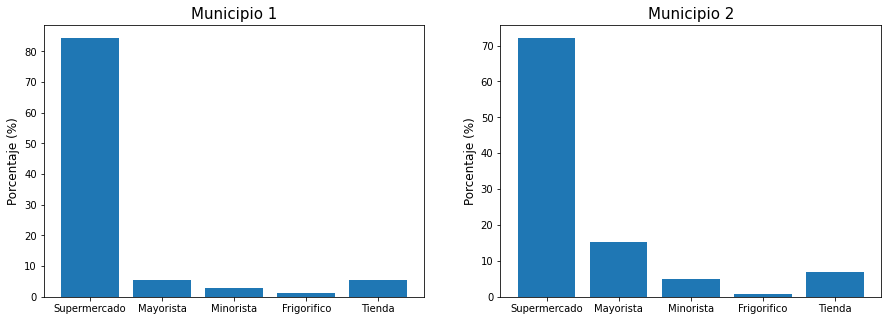

(array([195,  13,   7,   3,  13], dtype=int64),
 array([84.41558442,  5.62770563,  3.03030303,  1.2987013 ,  5.62770563]),
 array([189,  40,  13,   2,  18], dtype=int64),
 array([72.13740458, 15.26717557,  4.96183206,  0.76335878,  6.87022901]))

In [41]:
huevo_1 = huevos[0][huevos[0].columns[2]]
huevo_2 = huevos[1][huevos[1].columns[2]]
pltfig(huevo_1, huevo_2, 'lc')

### Cereales 

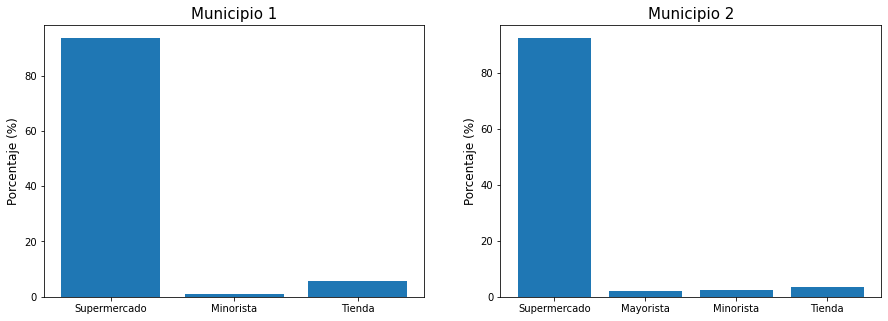

(array([219,   2,  13], dtype=int64),
 array([93.58974359,  0.85470085,  5.55555556]),
 array([242,   5,   6,   9], dtype=int64),
 array([92.36641221,  1.90839695,  2.29007634,  3.4351145 ]))

In [42]:
compracereales_1 = cereales[0][cereales[0].columns[2::5]].mode(axis = 'columns',numeric_only=False)
compracereales_2 = cereales[1][cereales[1].columns[2::5]].mode(axis = 'columns',numeric_only=False)
c_1 = compracereales_1[0].squeeze()
c_2 = compracereales_2[0].squeeze()
pltfig(c_1, c_2, 'lc')

### Abarrotes

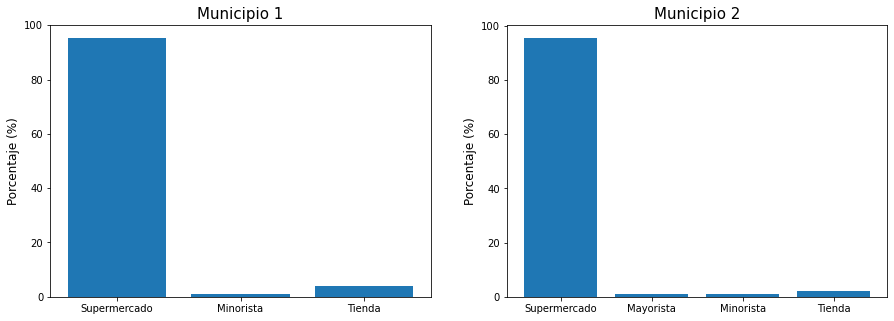

(array([225,   2,   9], dtype=int64),
 array([95.33898305,  0.84745763,  3.81355932]),
 array([254,   3,   3,   6], dtype=int64),
 array([95.4887218 ,  1.12781955,  1.12781955,  2.2556391 ]))

In [43]:
compraabarrotes_1 = abarrotes[0][abarrotes[0].columns[2::5]].mode(axis = 'columns',numeric_only=False)
compraabarrotes_2 = abarrotes[1][abarrotes[1].columns[2::5]].mode(axis = 'columns',numeric_only=False)
a_1 = compraabarrotes_1[0].squeeze()
a_2 = compraabarrotes_2[0].squeeze()
pltfig(a_1, a_2, 'lc')

### Pan

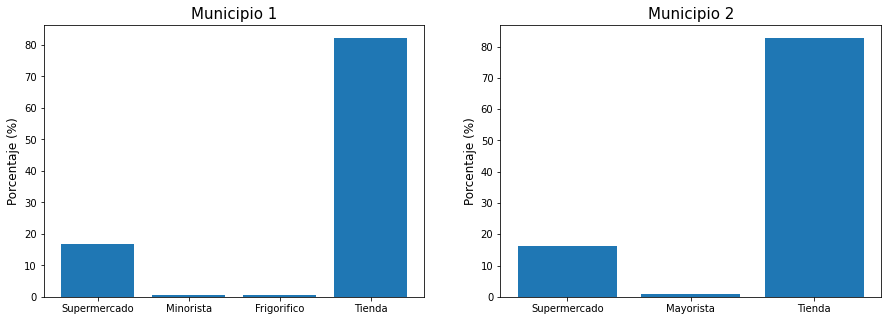

(array([ 33,   1,   1, 162], dtype=int64),
 array([16.75126904,  0.50761421,  0.50761421, 82.23350254]),
 array([ 34,   2, 173], dtype=int64),
 array([16.26794258,  0.9569378 , 82.77511962]))

In [44]:
pan_1 = panaderia[0][panaderia[0].columns[2]]
pan_2 = panaderia[1][panaderia[1].columns[2]]
pltfig(pan_1, pan_2, 'lc')

### Galletas

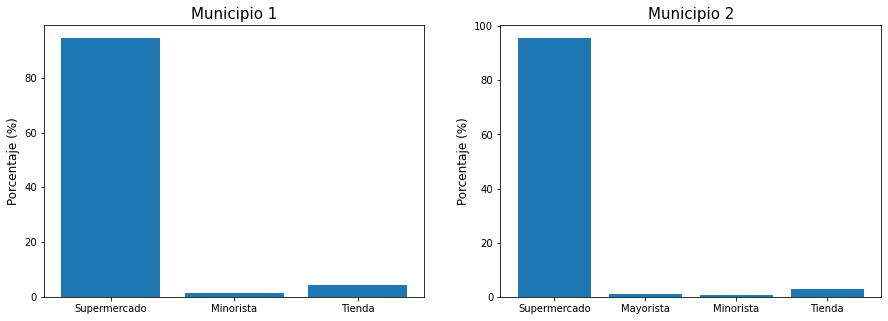

(array([156,   2,   7], dtype=int64),
 array([94.54545455,  1.21212121,  4.24242424]),
 array([197,   2,   1,   6], dtype=int64),
 array([95.63106796,  0.97087379,  0.48543689,  2.91262136]))

In [45]:
galletas_1 = panaderia[0][panaderia[0].columns[7]]
galletas_2 = panaderia[1][panaderia[1].columns[7]]
pltfig(galletas_1, galletas_2, 'lc')

### Bebidas

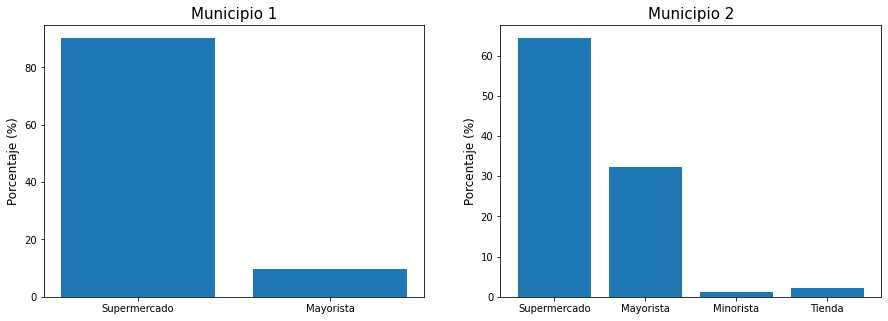

(array([74,  8], dtype=int64),
 array([90.24390244,  9.75609756]),
 array([58, 29,  1,  2], dtype=int64),
 array([64.44444444, 32.22222222,  1.11111111,  2.22222222]))

In [47]:
agua_1 = bebidas[0][bebidas[0].columns[2]]
agua_2 = bebidas[1][bebidas[1].columns[2]]
pltfig(agua_1, agua_2, 'lc')

## Frecuencia de Compra

### Carne de Res


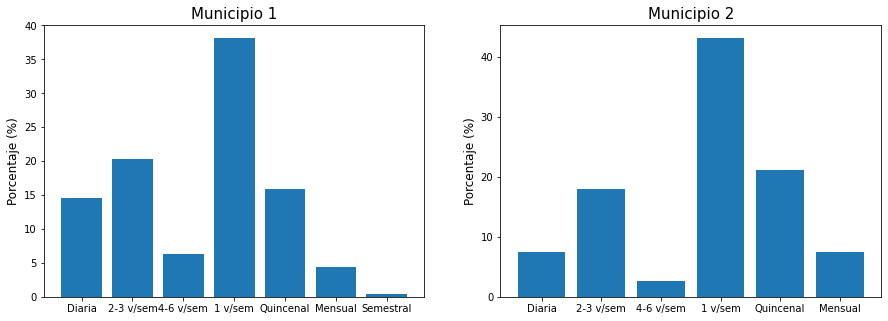

(array([30, 42, 13, 79, 33,  9,  1], dtype=int64),
 array([14.49275362, 20.28985507,  6.28019324, 38.16425121, 15.94202899,
         4.34782609,  0.48309179]),
 array([17, 41,  6, 98, 48, 17], dtype=int64),
 array([ 7.48898678, 18.06167401,  2.64317181, 43.17180617, 21.14537445,
         7.48898678]))

In [51]:
res_1 = carnes[0][carnes[0].columns[1]]
res_2 = carnes[1][carnes[1].columns[1]]
pltfig(res_1, res_2, 'fc')

### Carne de Cerdo

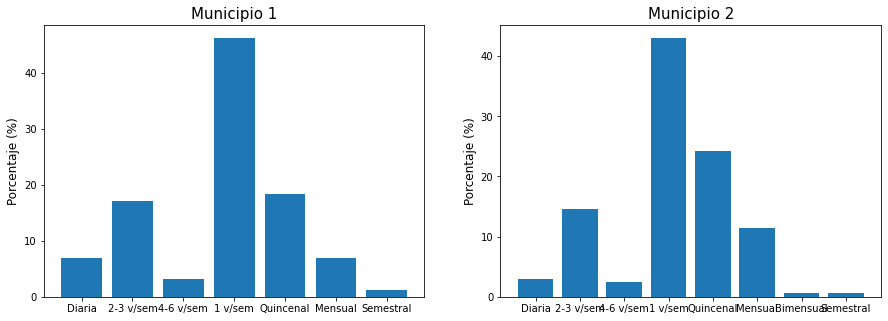

(array([11, 27,  5, 73, 29, 11,  2], dtype=int64),
 array([ 6.96202532, 17.08860759,  3.16455696, 46.20253165, 18.35443038,
         6.96202532,  1.26582278]),
 array([ 5, 24,  4, 71, 40, 19,  1,  1], dtype=int64),
 array([ 3.03030303, 14.54545455,  2.42424242, 43.03030303, 24.24242424,
        11.51515152,  0.60606061,  0.60606061]))

In [52]:
cerdo_1 = carnes[0][carnes[0].columns[6]]
cerdo_2 = carnes[1][carnes[1].columns[6]]
pltfig(cerdo_1, cerdo_2, 'fc')

### Carnes Procesadas

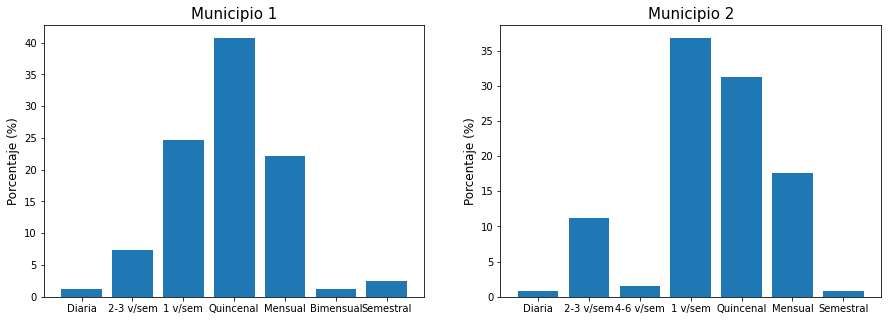

(array([ 1,  6, 20, 33, 18,  1,  2], dtype=int64),
 array([ 1.2345679 ,  7.40740741, 24.69135802, 40.74074074, 22.22222222,
         1.2345679 ,  2.4691358 ]),
 array([ 1, 14,  2, 46, 39, 22,  1], dtype=int64),
 array([ 0.8, 11.2,  1.6, 36.8, 31.2, 17.6,  0.8]))

In [53]:
procesadas_1 = carnes[0][carnes[0].columns[11]]
procesadas_2 = carnes[1][carnes[1].columns[11]]
pltfig(procesadas_1, procesadas_2, 'fc')

### Pescado

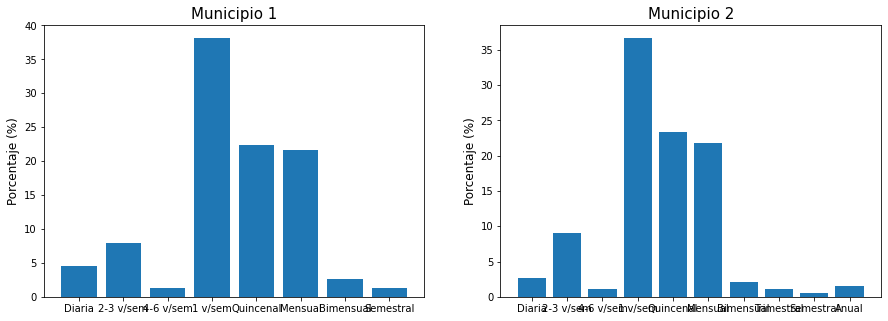

(array([ 7, 12,  2, 58, 34, 33,  4,  2], dtype=int64),
 array([ 4.60526316,  7.89473684,  1.31578947, 38.15789474, 22.36842105,
        21.71052632,  2.63157895,  1.31578947]),
 array([ 5, 17,  2, 69, 44, 41,  4,  2,  1,  3], dtype=int64),
 array([ 2.65957447,  9.04255319,  1.06382979, 36.70212766, 23.40425532,
        21.80851064,  2.12765957,  1.06382979,  0.53191489,  1.59574468]))

In [54]:
pescado_1 = carnes[0][carnes[0].columns[16]]
pescado_2 = carnes[1][carnes[1].columns[16]]
pltfig(pescado_1, pescado_2, 'fc')

### Carne de Pollo

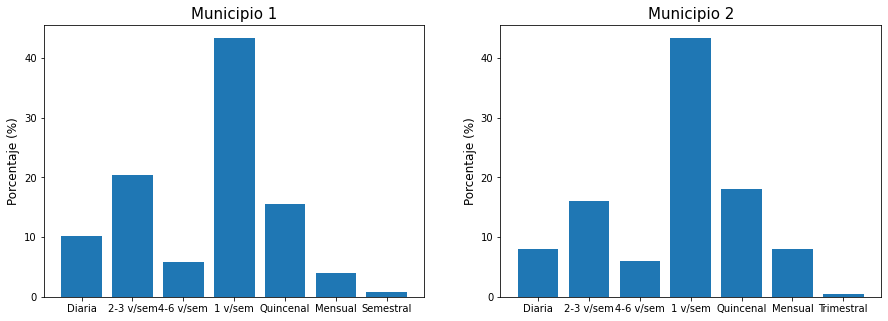

(array([23, 46, 13, 98, 35,  9,  2], dtype=int64),
 array([10.17699115, 20.3539823 ,  5.75221239, 43.36283186, 15.48672566,
         3.98230088,  0.88495575]),
 array([ 20,  40,  15, 108,  45,  20,   1], dtype=int64),
 array([ 8.03212851, 16.06425703,  6.02409639, 43.37349398, 18.07228916,
         8.03212851,  0.40160643]))

In [55]:
pollo_1 = carnes[0][carnes[0].columns[21]]
pollo_2 = carnes[1][carnes[1].columns[21]]
pltfig(pollo_1, pollo_2, 'fc')

### Frutas

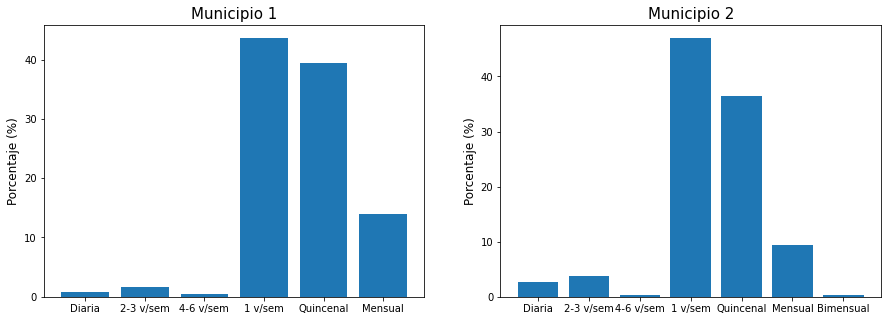

(array([  2,   4,   1, 103,  93,  33], dtype=int64),
 array([ 0.84745763,  1.69491525,  0.42372881, 43.6440678 , 39.40677966,
        13.98305085]),
 array([  7,  10,   1, 125,  97,  25,   1], dtype=int64),
 array([ 2.63157895,  3.7593985 ,  0.37593985, 46.9924812 , 36.46616541,
         9.39849624,  0.37593985]))

In [58]:
comprafruta_1 = frutas[0][frutas[0].columns[1::5]].mode(axis = 'columns',numeric_only = False)
comprafruta_2 = frutas[1][frutas[1].columns[1::5]].mode(axis = 'columns',numeric_only = False)
f_1 = comprafruta_1[0].squeeze()
f_2 = comprafruta_2[0].squeeze()
pltfig(f_1, f_2, 'fc')

### Verduras

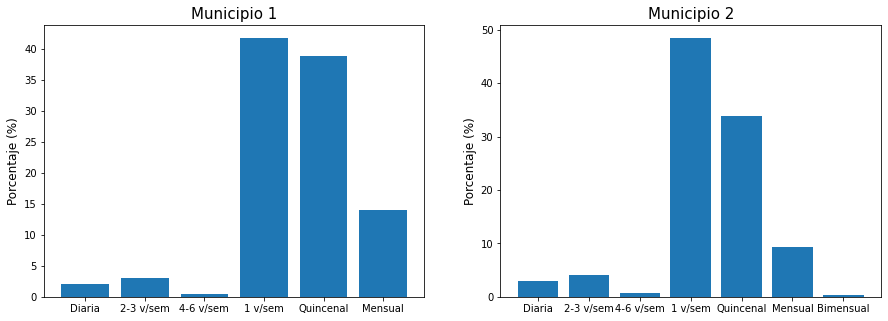

(array([ 5,  7,  1, 98, 91, 33], dtype=int64),
 array([ 2.12765957,  2.9787234 ,  0.42553191, 41.70212766, 38.72340426,
        14.04255319]),
 array([  8,  11,   2, 129,  90,  25,   1], dtype=int64),
 array([ 3.0075188 ,  4.13533835,  0.7518797 , 48.4962406 , 33.83458647,
         9.39849624,  0.37593985]))

In [59]:
compraverdura_1 = verduras[0][verduras[0].columns[1::5]].mode(axis = 'columns', numeric_only=False)
compraverdura_2 = verduras[1][verduras[1].columns[1::5]].mode(axis = 'columns', numeric_only=False)
v_1 = compraverdura_1[0].squeeze()
v_2 = compraverdura_2[0].squeeze()
pltfig(v_1, v_2, 'fc')

### Tuberculos

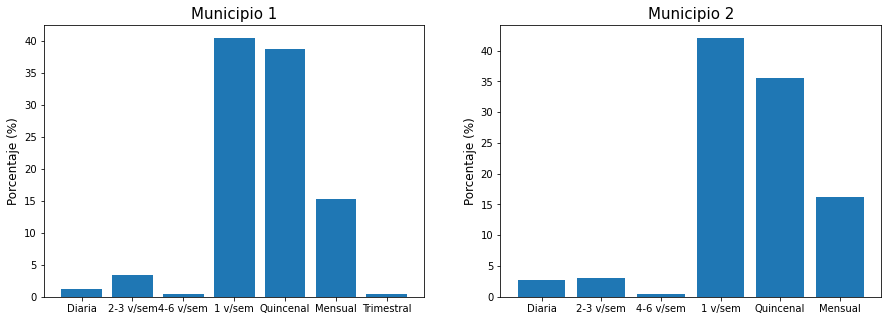

(array([ 3,  8,  1, 95, 91, 36,  1], dtype=int64),
 array([ 1.27659574,  3.40425532,  0.42553191, 40.42553191, 38.72340426,
        15.31914894,  0.42553191]),
 array([  7,   8,   1, 111,  94,  43], dtype=int64),
 array([ 2.65151515,  3.03030303,  0.37878788, 42.04545455, 35.60606061,
        16.28787879]))

In [60]:
compratuberculos_1 = tuberculos[0][tuberculos[0].columns[1::5]].mode(axis = 'columns',numeric_only=False)
compratuberculos_2 = tuberculos[1][tuberculos[1].columns[1::5]].mode(axis = 'columns',numeric_only=False)
t_1 = compratuberculos_1[0].squeeze()
t_2 = compratuberculos_2[0].squeeze()
pltfig(t_1, t_2, 'fc')

### Leche y derivados

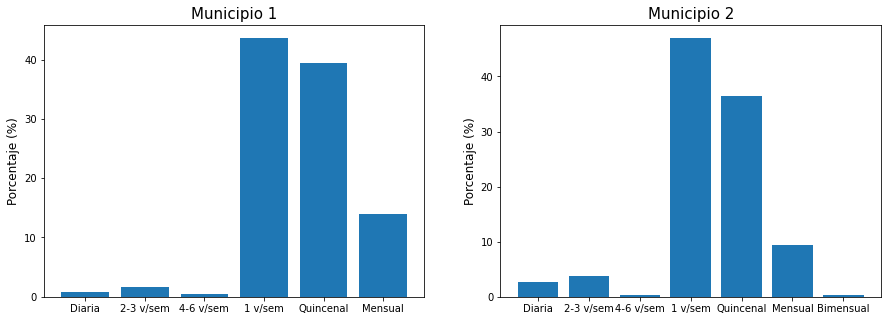

(array([  2,   4,   1, 103,  93,  33], dtype=int64),
 array([ 0.84745763,  1.69491525,  0.42372881, 43.6440678 , 39.40677966,
        13.98305085]),
 array([  7,  10,   1, 125,  97,  25,   1], dtype=int64),
 array([ 2.63157895,  3.7593985 ,  0.37593985, 46.9924812 , 36.46616541,
         9.39849624,  0.37593985]))

In [61]:
compralacteos_1 = lacteos[0][lacteos[0].columns[1::5]].mode(axis = 'columns',dropna = True)
compralacteos_2 = lacteos[1][lacteos[1].columns[1::5]].mode(axis = 'columns',dropna = True)
l_1 = compralacteos_1.squeeze()
l_2 = compralacteos_2.squeeze()
pltfig(f_1, f_2, 'fc')

### Huevo

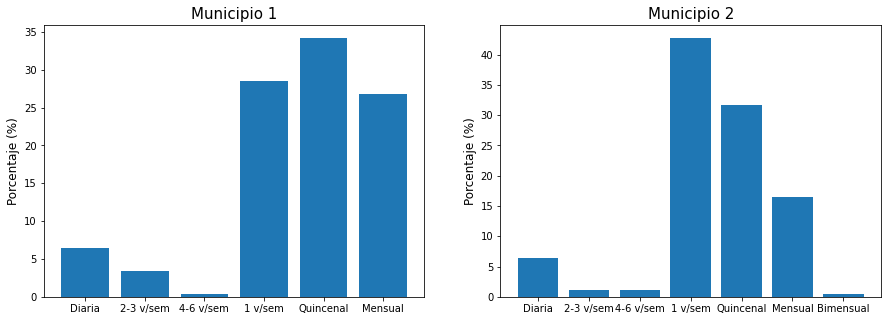

(array([15,  8,  1, 66, 79, 62], dtype=int64),
 array([ 6.49350649,  3.46320346,  0.43290043, 28.57142857, 34.1991342 ,
        26.83982684]),
 array([ 17,   3,   3, 112,  83,  43,   1], dtype=int64),
 array([ 6.48854962,  1.14503817,  1.14503817, 42.7480916 , 31.67938931,
        16.41221374,  0.38167939]))

In [65]:
huevo_1 = huevos[0][huevos[0].columns[1]]
huevo_2 = huevos[1][huevos[1].columns[1]]
pltfig(huevo_1, huevo_2, 'fc')

### Cereales 

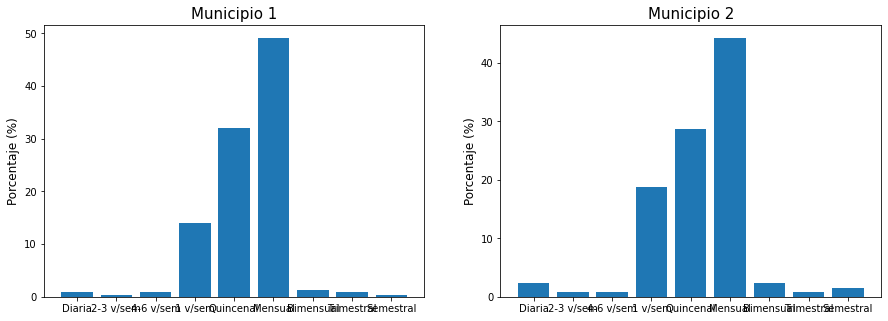

(array([  2,   1,   2,  33,  75, 115,   3,   2,   1], dtype=int64),
 array([ 0.85470085,  0.42735043,  0.85470085, 14.1025641 , 32.05128205,
        49.14529915,  1.28205128,  0.85470085,  0.42735043]),
 array([  6,   2,   2,  49,  75, 116,   6,   2,   4], dtype=int64),
 array([ 2.29007634,  0.76335878,  0.76335878, 18.70229008, 28.6259542 ,
        44.27480916,  2.29007634,  0.76335878,  1.52671756]))

In [66]:
compracereales_1 = cereales[0][cereales[0].columns[1::5]].mode(axis = 'columns',numeric_only=False)
compracereales_2 = cereales[1][cereales[1].columns[1::5]].mode(axis = 'columns',numeric_only=False)
c_1 = compracereales_1[0].squeeze()
c_2 = compracereales_2[0].squeeze()
pltfig(c_1, c_2, 'fc')

### Abarrotes

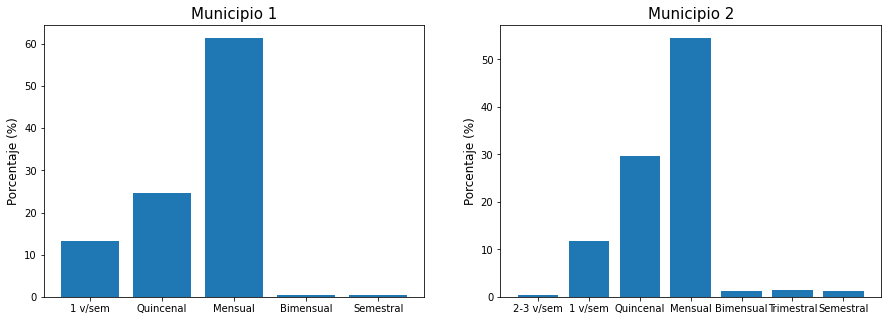

(array([ 31,  58, 145,   1,   1], dtype=int64),
 array([13.13559322, 24.57627119, 61.44067797,  0.42372881,  0.42372881]),
 array([  1,  31,  79, 145,   3,   4,   3], dtype=int64),
 array([ 0.37593985, 11.65413534, 29.69924812, 54.5112782 ,  1.12781955,
         1.5037594 ,  1.12781955]))

In [67]:
compraabarrotes_1 = abarrotes[0][abarrotes[0].columns[1::5]].mode(axis = 'columns',numeric_only=False)
compraabarrotes_2 = abarrotes[1][abarrotes[1].columns[1::5]].mode(axis = 'columns',numeric_only=False)
a_1 = compraabarrotes_1[0].squeeze()
a_2 = compraabarrotes_2[0].squeeze()
pltfig(a_1, a_2, 'fc')

### Pan

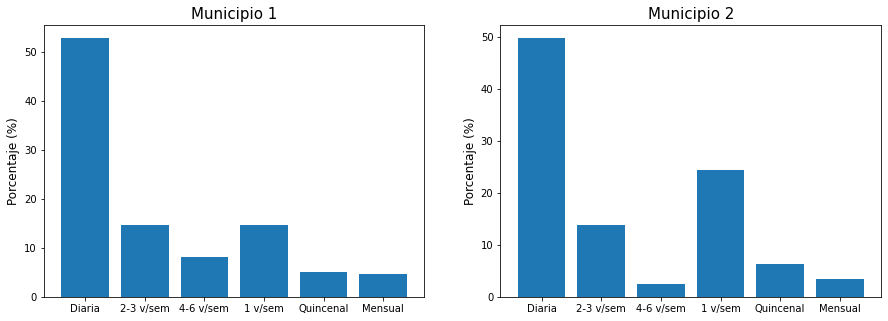

(array([104,  29,  16,  29,  10,   9], dtype=int64),
 array([52.79187817, 14.72081218,  8.12182741, 14.72081218,  5.07614213,
         4.56852792]),
 array([104,  29,   5,  51,  13,   7], dtype=int64),
 array([49.76076555, 13.87559809,  2.3923445 , 24.40191388,  6.22009569,
         3.3492823 ]))

In [68]:
pan_1 = panaderia[0][panaderia[0].columns[1]]
pan_2 = panaderia[1][panaderia[1].columns[1]]
pltfig(pan_1, pan_2, 'fc')

### Galletas

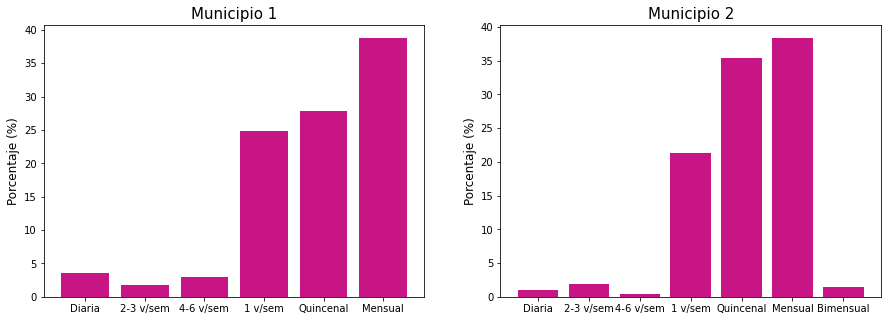

(array([ 6,  3,  5, 41, 46, 64], dtype=int64),
 array([ 3.63636364,  1.81818182,  3.03030303, 24.84848485, 27.87878788,
        38.78787879]),
 array([ 2,  4,  1, 44, 73, 79,  3], dtype=int64),
 array([ 0.97087379,  1.94174757,  0.48543689, 21.3592233 , 35.4368932 ,
        38.34951456,  1.45631068]))

In [90]:
galletas_1 = panaderia[0][panaderia[0].columns[6]]
galletas_2 = panaderia[1][panaderia[1].columns[6]]
pltfig(galletas_1, galletas_2, 'fc')

### Bebidas

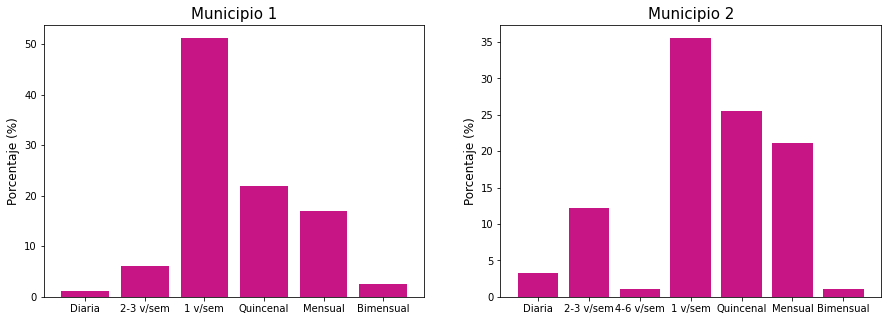

(array([ 1,  5, 42, 18, 14,  2], dtype=int64),
 array([ 1.2195122 ,  6.09756098, 51.2195122 , 21.95121951, 17.07317073,
         2.43902439]),
 array([ 3, 11,  1, 32, 23, 19,  1], dtype=int64),
 array([ 3.33333333, 12.22222222,  1.11111111, 35.55555556, 25.55555556,
        21.11111111,  1.11111111]))

In [89]:
agua_1 = bebidas[0][bebidas[0].columns[1]]
agua_2 = bebidas[1][bebidas[1].columns[1]]
pltfig(agua_1, agua_2, 'fc')

### Bebidas

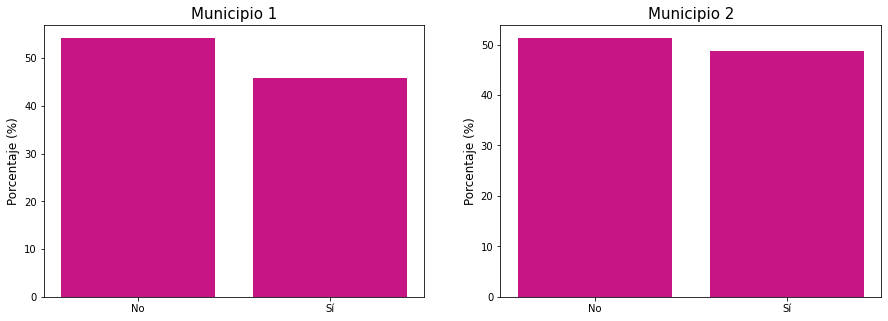

(array([128, 108], dtype=int64),
 array([54.23728814, 45.76271186]),
 array([137, 130], dtype=int64),
 array([51.31086142, 48.68913858]))

In [133]:
agua_1 = verduras[0][verduras[0].columns[65]]
agua_2 = verduras[1][verduras[1].columns[65]]
pltfig(agua_1, agua_2, kind='bar')

In [132]:
print(len(frutas[0].columns)/5)
print(len(verduras[0].columns)/5)

21.0
15.0
